In [ ]:
#words = open('makemore/names.txt', 'r').read().splitlines()

In [2]:
import pandas as pd
df_nomes_br = pd.read_csv('nomes-censos-ibge.csv')
nomes = list(df_nomes_br['Nome'])
nomes = [x.lower() for x in nomes if isinstance(x, str)]

In [3]:
nomes[:10]

['maria',
 'ana',
 'joao',
 'gabriel',
 'lucas',
 'pedro',
 'mateus',
 'jose',
 'gustavo',
 'vitoria']

In [4]:
words = nomes

In [150]:
len(words)

64457

In [138]:
min(len(w) for w in words)

2

In [139]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words: # aqui foi modificado para trocar o s e e por ponto (.)
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [8]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('a', '<E>'), 16512),
 (('a', 'n'), 13555),
 (('e', '<E>'), 11924),
 (('e', 'l'), 10257),
 (('n', 'e'), 9065),
 (('o', '<E>'), 8786),
 (('i', 'l'), 8710),
 (('l', 'e'), 8084),
 (('l', 'i'), 7828),
 (('i', 'a'), 7722),
 (('n', '<E>'), 7468),
 (('o', 'n'), 7381),
 (('i', 'n'), 7179),
 (('a', 'r'), 7034),
 (('n', 'i'), 7018),
 (('a', 'l'), 6578),
 (('<S>', 'a'), 6483),
 (('d', 'e'), 6389),
 (('n', 'a'), 6368),
 (('e', 'r'), 6285),
 (('e', 'n'), 6256),
 (('r', 'i'), 6230),
 (('<S>', 'e'), 5860),
 (('l', 'a'), 5717),
 (('<S>', 'j'), 5674),
 (('m', 'a'), 5486),
 (('i', '<E>'), 5208),
 (('r', 'a'), 5205),
 (('c', 'i'), 5033),
 (('d', 'i'), 4770),
 (('v', 'a'), 4701),
 (('e', 'i'), 4630),
 (('i', 's'), 4617),
 (('s', 'o'), 4293),
 (('r', '<E>'), 4171),
 (('i', 'r'), 4084),
 (('<S>', 'd'), 4076),
 (('<S>', 'r'), 4032),
 (('l', 'd'), 4027),
 (('<S>', 'm'), 3951),
 (('<S>', 'l'), 3878),
 (('<S>', 'c'), 3792),
 (('a', 'i'), 3602),
 (('<S>', 'g'), 3519),
 (('d', 'a'), 3277),
 (('s', 'i'), 3264),


In [9]:
import torch

In [10]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [154]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

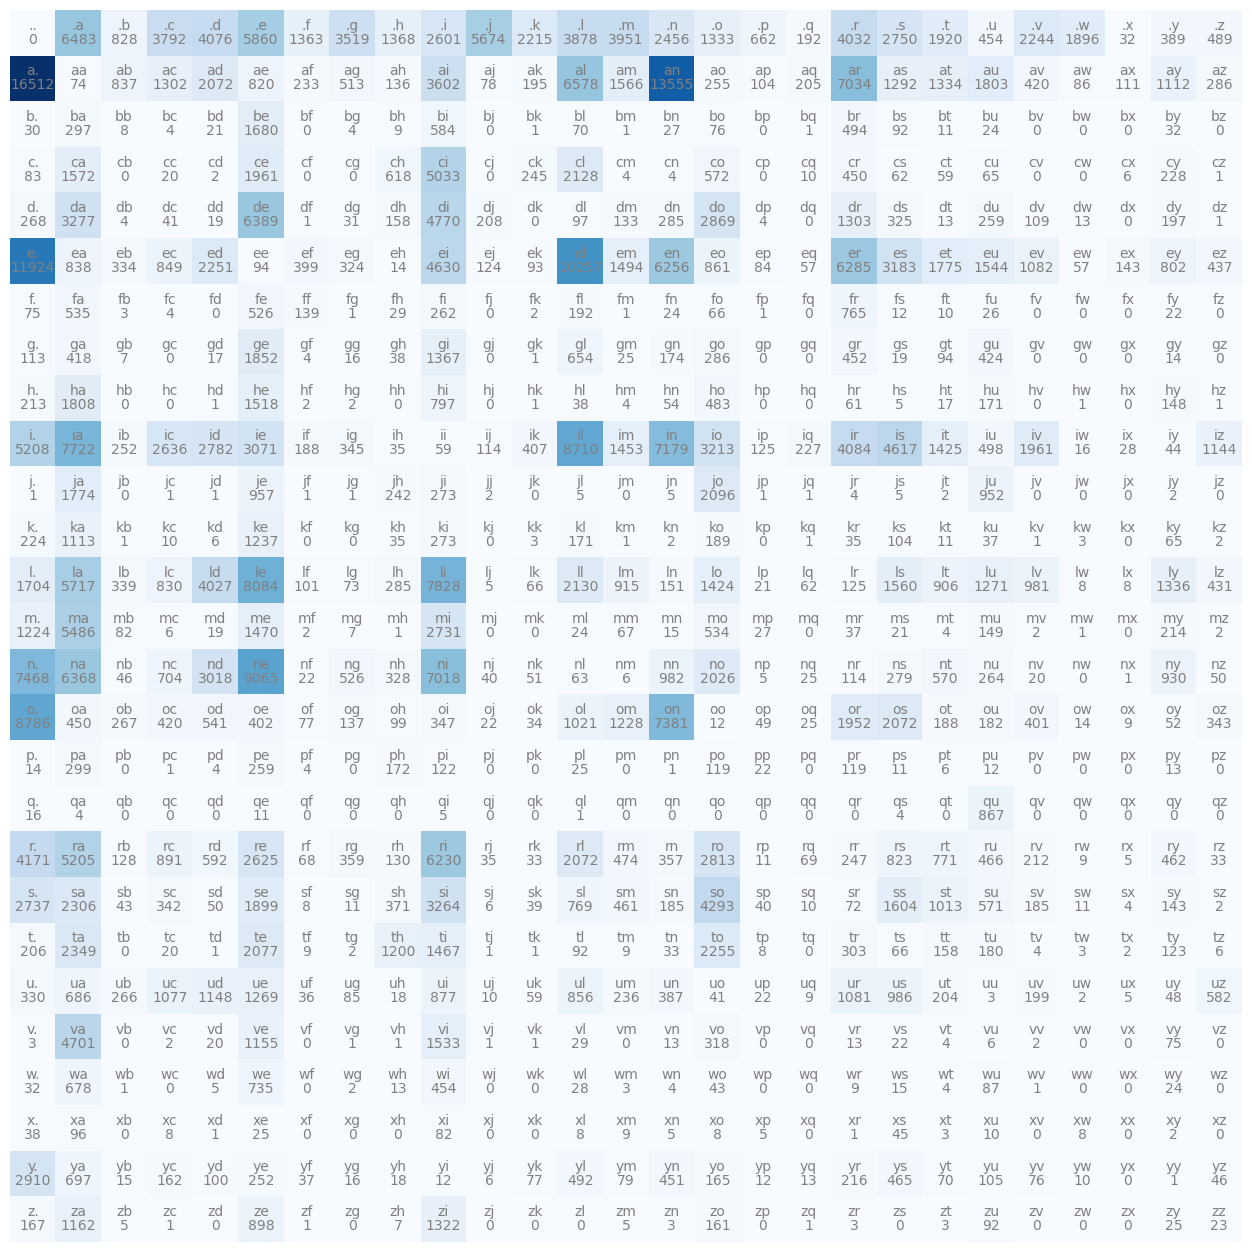

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [38]:
P = (N+1).float() # adicionando 1 para nao ter probabilidade 0 (gerando log -inf)
P /= P.sum(1, keepdims=True) # aqui deu trabalho de entender o pq do keepdims
print(P.shape) 
print(P[0])

torch.Size([27, 27])
tensor([1.5508e-05, 1.0055e-01, 1.2856e-02, 5.8821e-02, 6.3225e-02, 9.0891e-02,
        2.1153e-02, 5.4587e-02, 2.1230e-02, 4.0351e-02, 8.8006e-02, 3.4365e-02,
        6.0154e-02, 6.1287e-02, 3.8102e-02, 2.0687e-02, 1.0282e-02, 2.9930e-03,
        6.2543e-02, 4.2662e-02, 2.9790e-02, 7.0560e-03, 3.4815e-02, 2.9418e-02,
        5.1175e-04, 6.0480e-03, 7.5988e-03])


In [42]:
g = torch.Generator().manual_seed(131221)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


fudo.
dedeileminimetano.
jinencir.
omina.
eirm.


In [40]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-1201814.2500)
nll=tensor(1201814.2500)
nll/n=tensor(2.3371)


In [ ]:
# agora uma abordagem com redes neurais


In [ ]:
# criando o training set dos bigramas
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. m
m a
a r
r i
i a
a .


In [49]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()


In [51]:
xenc.dtype

torch.float32

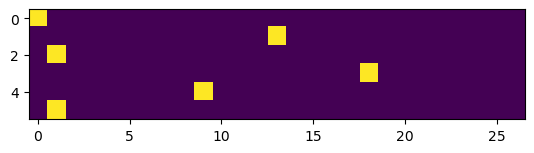

In [50]:
plt.imshow(xenc)

In [65]:
W = torch.randn((27, 27))


In [66]:
logits = (xenc @ W) # log-counts

# softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [67]:
nlls = torch.zeros(6)
for i in range(6):
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the nn to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('===========')
print('average negative log likelihood (loss) = ', nlls.mean().item())

--------
bigram example 1: .m (indexes 0,13)
input to the neural net: 0
output probabilities from the neural net: tensor([0.1008, 0.0227, 0.0050, 0.0299, 0.0045, 0.0684, 0.0151, 0.0083, 0.0147,
        0.0275, 0.0070, 0.0133, 0.0183, 0.0111, 0.0425, 0.1619, 0.0257, 0.0089,
        0.0193, 0.0470, 0.1401, 0.0796, 0.0304, 0.0134, 0.0096, 0.0536, 0.0213])
label (actual next character): 13
probability assigned by the nn to the correct character 0.011106705293059349
log likelihood: -4.500206470489502
negative log likelihood: 4.500206470489502
--------
bigram example 2: ma (indexes 13,1)
input to the neural net: 13
output probabilities from the neural net: tensor([0.0759, 0.0075, 0.0134, 0.0465, 0.0145, 0.0100, 0.0410, 0.0074, 0.0141,
        0.0042, 0.0309, 0.0019, 0.0069, 0.0024, 0.0210, 0.0063, 0.0387, 0.0701,
        0.0473, 0.0278, 0.0145, 0.0402, 0.0238, 0.1949, 0.1687, 0.0594, 0.0107])
label (actual next character): 1
probability assigned by the nn to the correct character 0.007462222

In [69]:
xs

tensor([ 0, 13,  1, 18,  9,  1])

In [70]:
ys

tensor([13,  1, 18,  9,  1,  0])

In [80]:
# consolidando tudo
g = torch.Generator().manual_seed(1337)
W = torch.randn((27, 27), generator=g, requires_grad=True)


In [96]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() #aplicando o 1hot para input da rede
logits = xenc @ W # fazer a predicao dos log-counts multiplicando as entradas pelos pesos dos neuronios
counts = logits.exp() # convertendo pra contagem, algo equivalente ao N que tinhamos no exemplo anterior
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(6), ys].log().mean()

In [97]:
print(loss)

tensor(3.3914, grad_fn=<NegBackward0>)


In [95]:
# backprop
W.grad = None # zerando os gradientes
loss.backward()
W.data += -0.1 * W.grad

In [83]:
W.grad

tensor([[ 0.0049,  0.0038,  0.0029,  0.0016,  0.0076,  0.0042,  0.0106,  0.0044,
          0.0059,  0.0131,  0.0011,  0.0025,  0.0052, -0.1634,  0.0016,  0.0191,
          0.0158,  0.0036,  0.0054,  0.0107,  0.0005,  0.0067,  0.0181,  0.0074,
          0.0046,  0.0009,  0.0013],
        [-0.1623,  0.0095,  0.0027,  0.0279,  0.0747,  0.0031,  0.0047,  0.0167,
          0.0069,  0.0071,  0.0189,  0.0019,  0.0045,  0.0037,  0.0024,  0.0105,
          0.0014,  0.0018, -0.1559,  0.0033,  0.0030,  0.0315,  0.0027,  0.0235,
          0.0046,  0.0013,  0.0499],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [107]:
# AGORA SIM TUDO ORGANIZADO PARA AS REDES NEURAIS
# criando o training set dos bigramas
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# inicializando a rede
g = torch.Generator().manual_seed(1337)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  514239


In [109]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() #aplicando o 1hot para input da rede
    logits = xenc @ W # fazer a predicao dos log-counts multiplicando as entradas pelos pesos dos neuronios
    counts = logits.exp() # convertendo pra contagem, algo equivalente ao N que tinhamos no exemplo anterior
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backprop
    W.grad = None
    loss.backward()

    # atualizacao dos pesos
    W.data += -50 * W.grad


2.359266757965088
2.3590211868286133
2.358781337738037
2.3585457801818848
2.3583157062530518
2.3580896854400635
2.357868194580078
2.357651472091675
2.357438564300537
2.357229709625244
2.357025384902954
2.3568246364593506
2.356627941131592
2.3564341068267822
2.3562448024749756
2.3560585975646973
2.3558757305145264
2.355696201324463
2.3555197715759277
2.3553466796875
2.3551764488220215
2.3550093173980713
2.3548455238342285
2.3546841144561768
2.354525327682495
2.3543691635131836
2.3542160987854004
2.354065418243408
2.353917360305786
2.353771448135376
2.353628396987915
2.353487253189087
2.353348731994629
2.3532121181488037
2.3530781269073486
2.3529462814331055
2.352816343307495
2.3526880741119385
2.352562189102173
2.35243821144104
2.352316379547119
2.352196455001831
2.3520779609680176
2.351961612701416
2.3518471717834473
2.3517343997955322
2.351623296737671
2.351513624191284
2.351405620574951
2.351299285888672
2.351194143295288
2.351091146469116
2.350989580154419
2.3508894443511963
2.35079